## Assessing, Analyzing Wine data and Apply Machine Learning Algorithm that Classify Quality level  

## Introduction: 

Wine is an alcoholic beverage made from fermented grapes. Yeast consumes the sugar in the grapes and converts it to ethanol, carbon dioxide, and heat.
It is a pleasant tasting alcoholic beverage.
It will definitely be interesting to analyze the attributes of wine and understand their relationships and significance with wine quality label.

## Data sets 

The dataset are related to red and white variants of the "Vinho Verde" wine. Vinho verde is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness (specially in the summer).
Where did we get our data sets
We found our datasets sets from The University of California Irivne, center for Machine learning and Intelligent Systems
Originally our data sets Consists of both red and wine of which 6463 – Rows and 14 Columns.

## The Aim of this Present Project

 To asses and analyzethedatasetsbyapplyingtechniquesandmethodsofdata analytics and get meaningful insight
 
Analyze the attributes (characteristics) which contributes to goodness of wine’s quality

Employ a predictive machine learning algorithm to make a classification of wine’s quality label and see how the model does the prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.tree as tree


%matplotlib inline

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.externals.six import StringIO
from sklearn.model_selection import GridSearchCV

/Users/dave/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
Winedata = pd.read_csv("winequalityN.csv")

In [3]:
Winedata.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [40]:
Winedata.shape

(6463, 14)

In [4]:
Winedata['quality_label'] = Winedata.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')

In [5]:
Winedata.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


In [6]:
Winedata['type'].unique()

array(['white', 'red'], dtype=object)

In [7]:
Winedata.shape

(6497, 14)

In [8]:
Winedata.quality_label.value_counts()

medium    3915
low       2384
high       198
Name: quality_label, dtype: int64

In [9]:
Winedata.dropna(inplace=True)

In [10]:
Winedata.shape

(6463, 14)

In [11]:
Winedata['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

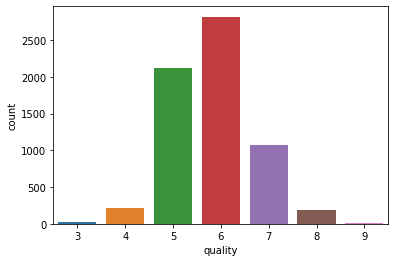

In [41]:
#file.plot(x='type', y='quality')

#sb.scatterplot(x='type', y='quality', data=file)

#file.plot(x='type', y='quality',figsize=(10,5),color='yellow' )

## Plot qulaity label distribution 
sb.countplot(x='quality', data=Winedata)

### Distributions of the data in the qualities by their types

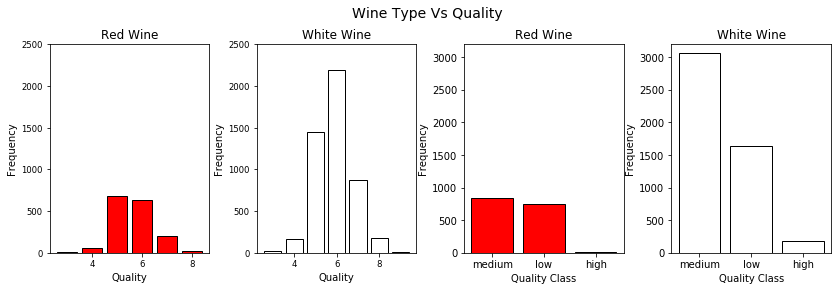

In [13]:
fig = plt.figure(figsize = (14, 4))
title = fig.suptitle("Wine Type Vs Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,4, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = Winedata.quality[Winedata.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,4, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = Winedata.quality[Winedata.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1,4, 3)
ax3.set_title("Red Wine")
ax3.set_xlabel("Quality Class")
ax3.set_ylabel("Frequency") 
rw_q = Winedata.quality_label[Winedata.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax3.set_ylim([0, 3200])
bar3 = ax3.bar(list(range(len(rw_q[0]))), rw_q[1], color='red', edgecolor='black', linewidth=1, tick_label =rw_q[0])

ax4 = fig.add_subplot(1,4, 4)
ax4.set_title("White Wine")
ax4.set_xlabel("Quality Class")
ax4.set_ylabel("Frequency") 
ww_q = Winedata.quality_label[Winedata.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax4.set_ylim([0, 3200])
bar4 = ax4.bar(list(range(len(ww_q[0]))), ww_q[1], color='white', edgecolor='black', linewidth=1, tick_label =ww_q[0])

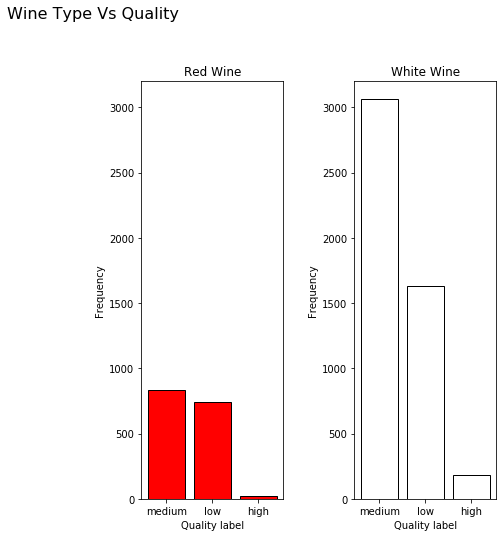

In [14]:
fig = plt.figure(figsize = (14, 8))
title = fig.suptitle("Wine Type Vs Quality", fontsize=16)
fig.subplots_adjust(top=0.85, wspace=0.5)

ax3 = fig.add_subplot(1,4, 3)
ax3.set_title("Red Wine")
ax3.set_xlabel("Quality label")
ax3.set_ylabel("Frequency") 
rw_q = Winedata.quality_label[Winedata.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax3.set_ylim([0, 3200])
bar3 = ax3.bar(list(range(len(rw_q[0]))), rw_q[1], color='red', edgecolor='black', linewidth=1, tick_label =rw_q[0])

ax4 = fig.add_subplot(1,4, 4)
ax4.set_title("White Wine")
ax4.set_xlabel("Quality label")
ax4.set_ylabel("Frequency") 
ww_q = Winedata.quality_label[Winedata.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax4.set_ylim([0, 3200])
bar4 = ax4.bar(list(range(len(ww_q[0]))), ww_q[1], color='white', edgecolor='black', linewidth=1, tick_label =ww_q[0])

In [15]:
#display(np.round(file.describe()))

#### Some useful stat based on the type of wine 

In [16]:
subset_attributes = ['fixed acidity','volatile acidity','chlorides','total sulfur dioxide','sulphates',
                     'residual sugar','pH']
Reds = round(Winedata.loc[Winedata.type == 'red', subset_attributes].describe(),2)
Wihites = round(Winedata.loc[Winedata.type == 'white', subset_attributes].describe(),2)
pd.concat([Reds, Wihites], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics'])

fixed acidity  volatile acidity  chlorides  \
Red Wine Statistics   count        1593.00           1593.00    1593.00   
                      mean            8.33              0.53       0.09   
                      std             1.74              0.18       0.05   
                      min             4.60              0.12       0.01   
                      25%             7.10              0.39       0.07   
                      50%             7.90              0.52       0.08   
                      75%             9.20              0.64       0.09   
                      max            15.90              1.58       0.61   
White Wine Statistics count        4870.00           4870.00    4870.00   
                      mean            6.86              0.28       0.05   
                      std             0.84              0.10       0.02   
                      min             3.80              0.08       0.01   
                      25%             6.30              0.21       0.04   
                      50%             6.80              0.26       0.04   
                      75%             7.30              0.32       0.05   
                      max            14.20              1.10       0.35   

                             total sulfur dioxide  sulphates  residual sugar  \
Red Wine Statistics   count               1593.00    1593.00         1593.00   
                      mean                  46.46       0.66            2.54   
                      std                   32.91       0.17            1.41   
                      min                    6.00       0.33            0.90   
                      25%                   22.00       0.55            1.90   
                      50%                   38.00       0.62            2.20   
                      75%                   62.00       0.73            2.60   
                      max                  289.00       2.00           15.50   
White Wine Statistics count               4870.00    4870.00         4870.00   
                      mean                 138.34       0.49            6.39   
                      std                   42.49       0.11            5.07   
                      min                    9.00       0.22            0.60   
                      25%                  108.00       0.41            1.70   
                      50%                  134.00       0.47            5.20   
                      75%                  167.00       0.55            9.90   
                      max                  440.00       1.08           65.80   

                                  pH  
Red Wine Statistics   count  1593.00  
                      mean      3.31  
                      std       0.15  
                      min       2.74  
                      25%       3.21  
                      50%       3.31  
                      75%       3.40  
                      max       4.01  
White Wine Statistics count  4870.00  
                      mean      3.19  
                      std       0.15  
                      min       2.72  
                      25%       3.09  
                      50%       3.18  
                      75%       3.28  
                      max       3.82

From descriptive statisct above:

Mean residual sugar and total sulfur dioxide content in white wine seems to be much higher than red wine.


Mean value of sulphates, fixed acidity and volatile acidity seem to be higher in red wine as compared to white wine.


From all numbers, we can observe that citric acid is more present in white than red wines.


In general, white wines has half concentrations of chlorides then red wines.


Although in Ph the difference seems small it is interesting to note that it is slightly larger in green red wines.

#### Some useful stat based on the wine qulaity classes 

In [17]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality','total sulfur dioxide']
lowq = round(Winedata[Winedata['quality_label'] == 'low'][subset_attributes].describe(),2)
mediumeq = round(Winedata[Winedata['quality_label'] == 'medium'][subset_attributes].describe(),2)
highq = round(Winedata[Winedata['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([lowq, mediumeq, highq], axis=0, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

alcohol  volatile acidity       pH  quality  \
Low Quality Wine    count  2372.00           2372.00  2372.00  2372.00   
                    mean      9.87              0.40     3.21     4.88   
                    std       0.84              0.19     0.16     0.36   
                    min       8.00              0.10     2.74     3.00   
                    25%       9.30              0.26     3.11     5.00   
                    50%       9.60              0.34     3.20     5.00   
                    75%      10.40              0.50     3.31     5.00   
                    max      14.90              1.58     3.90     5.00   
Medium Quality Wine count  3894.00           3894.00  3894.00  3894.00   
                    mean     10.81              0.31     3.22     6.28   
                    std       1.20              0.14     0.16     0.45   
                    min       8.40              0.08     2.72     6.00   
                    25%       9.80              0.21     3.11     6.00   
                    50%      10.80              0.27     3.21     6.00   
                    75%      11.70              0.36     3.32     7.00   
                    max      14.20              1.04     4.01     7.00   
High Quality Wine   count   197.00            197.00   197.00   197.00   
                    mean     11.69              0.29     3.22     8.03   
                    std       1.27              0.12     0.16     0.16   
                    min       8.50              0.12     2.88     8.00   
                    25%      11.00              0.21     3.13     8.00   
                    50%      12.00              0.27     3.23     8.00   
                    75%      12.60              0.35     3.33     8.00   
                    max      14.00              0.85     3.72     9.00   

                           total sulfur dioxide  
Low Quality Wine    count               2372.00  
                    mean                 119.21  
                    std                   61.90  
                    min                    6.00  
                    25%                   68.00  
                    50%                  124.00  
                    75%                  167.00  
                    max                  440.00  
Medium Quality Wine count               3894.00  
                    mean                 113.45  
                    std                   53.57  
                    min                    6.00  
                    25%                   81.00  
                    50%                  116.00  
                    75%                  150.00  
                    max                  294.00  
High Quality Wine   count                197.00  
                    mean                 117.70  
                    std                   41.69  
                    min                   12.00  
                    25%                   96.00  
                    50%                  119.00  
                    75%                  145.00  
                    max                  212.50

Again, from the descriptive statisct of quality perspective :

It is interesting how alcohol does not give us much variation to distinguish whether the vine is white or red, but it makes a lot of difference in quality. 

Note that the higher the quality the higher the average alcohol concentration, increased by about 1% at each level. Although lower quality wines have the lowest standard deviation.


The volatile acidity are less present and presented smaller standard deviation in wines of higher quality.
The free sulfur dioxide is higher with higher quality, but their standard deviation decrease with the increase the quality.
Higher quality has less fixed acidity, but the standard deviation is slightly higher in mean quality

## Is there correlations based on wines types


In [18]:
Winedata.shape

(6463, 14)

In [19]:
#Windatanew.info()

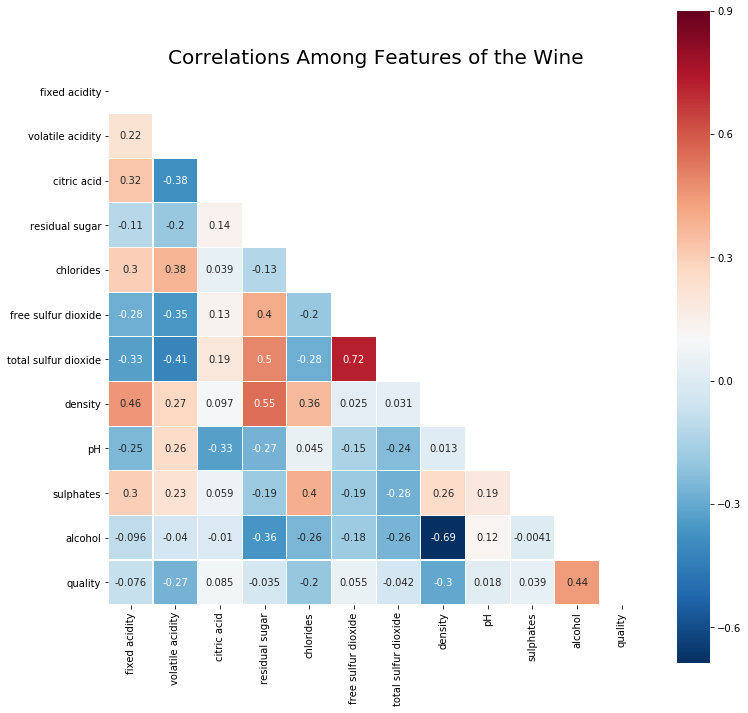

In [20]:
mask = np.zeros_like(Winedata.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (12,12))
sb.heatmap(Winedata.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features of the Wine", y = 1.03,fontsize = 20)
plt.show()

In [21]:
NotGood = Winedata[Winedata.quality_label == 'low']
Good = Winedata[Winedata.quality_label == 'medium']
Excellent = Winedata[Winedata.quality_label == 'high']

In [22]:
drop_items = ['quality','quality_label']
g1 = pd.DataFrame(Good.drop(drop_items, axis=1).mean(), columns=['Good']).T
g2 = pd.DataFrame(NotGood.drop(drop_items, axis=1).mean(), columns=['Not Good']).T
g3 = pd.DataFrame(Excellent.drop(drop_items, axis=1).mean(), columns=['Excellent']).T
total = pd.DataFrame(Winedata.drop(drop_items, axis=1).mean(), columns=['Total Average']).T
data = g1.append([g2,g3, total])

In [23]:
temp1 = data.values.reshape((4, 11))
standard = data.loc['Total Average'].values.reshape((1, 11))
temp = 100* temp1 / standard
data_percentage = pd.DataFrame(temp, columns = data.columns.values.tolist())


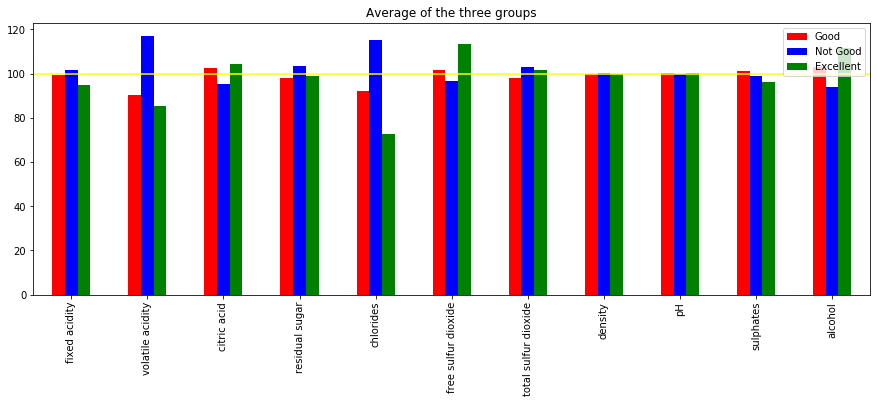

In [24]:

data_percentage[:3].T.plot(kind='bar',figsize=(15,5), color=['red','blue','green'])
plt.title('Average of the three groups')
plt.legend(('Good','Not Good','Excellent'))
x = np.linspace(-10,100,10)
y = 100*np.ones(10)
plt.plot(x,y,'yellow')
plt.show()

### Observation 

On average, the more wine includes citric acid, sulphates, or alcohol, the wine is better, otherwise the less wine includes free sulfur dioxide, volatile acidity, or total sulfur dioxide, the wine is better.

In [25]:
#extract target variable
#make copy of 'quality_label' column
y = Winedata['quality_label']
y.head(15)

0     medium
1     medium
2     medium
3     medium
4     medium
5     medium
6     medium
7     medium
8     medium
9     medium
10       low
11       low
12       low
13    medium
14       low
Name: quality_label, dtype: object

In [26]:
#featuers = Windatanew[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide',
                       #'total sulfur dioxide','density','pH','sulphates','alcohol']].values

#copy of modeldf without 'survived' column
X = Winedata.drop(['quality_label','type','quality'], axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [27]:
#75% for training data, 25% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [28]:
#assign decision tree function to model variable
tree = tree.DecisionTreeClassifier()

In [29]:
#develop model using training data
#defining arguments in the model can help prevent overfitting
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
#accuracy score of model on training data
tree.score(X_train, y_train)

1.0

In [31]:
#run the predictions on the test data
y_predict = tree.predict(X_test)


In [32]:
print(y_predict[:15])

['low' 'low' 'low' 'medium' 'medium' 'high' 'medium' 'medium' 'medium'
 'low' 'low' 'medium' 'low' 'medium' 'low']


In [33]:
#accuracy score of model on test data
tree.score(X_test, y_test)

0.7382425742574258

In [34]:
#look at true and predictions of quality lebales 
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted high quality', 'Predicted low quality','Predicted medium quality'],
    index=['True  high', 'True low','True medium']
)

,Predicted high quality,Predicted low quality,Predicted medium quality
True high,28,3,29
True low,8,417,176
True medium,20,187,748


In [35]:
#from precision column, model is better at predicting the medime and low quality lables has been predicted well
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.50      0.47      0.48        60
         low       0.69      0.69      0.69       601
      medium       0.78      0.78      0.78       955

    accuracy                           0.74      1616
   macro avg       0.66      0.65      0.65      1616
weighted avg       0.74      0.74      0.74      1616



## Conclusion: 

### Analysis:
 
Mean residual sugar and total sulfur dioxide content in white wine seems to be much higher than red wine.
Mean value of sulphates, fixed acidity and volatile acidity seem to be higher in red wine as compared to white wine.
From all numbers, we can observe that citric acid is more present in white than red wines.
It is interesting how alcohol does not give us much variation to distinguish whether the vine is white or red, but it makes a lot of difference in quality.
The free sulfur dioxide is higher with higher quality, but their standard deviation decreases with the increase the quality.
### Predictive Model:
Our Predictive model classify both the medium and low quality label of wine’s well.